# Tres partículas en red de resortes

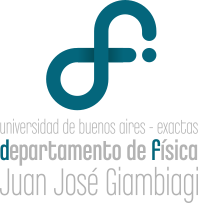  
Adaptación del notebook escrito por el estudiante Facundo Joaquin Garcia, 2.o cuat. 2020  
©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

----

## Enunciado
Considere el sistema de la figura, en la que los resortes verticales tienen longitud natural $l_0$ y constante $k_1$, y los horizontales $a_0= 0$ (son *slinkies*) y $k_2$.
Calcule las frecuencias propias y los modos normales.   
![](figuras/ej1-10.png)

## Energía potencial

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sym.Symbol('t')
m, k, l0, d, L = sym.symbols('m, k, l_0, d, L', positive= True) # parámetros físicos

psiax, psiay, psibx, psiby, psicx, psicy = mech.dynamicsymbols(
    '\psi_{ax}, \psi_{ay}, \psi_{bx}, \psi_{by}, \psi_{cx}, \psi_{cy},') # funciones de t

In [3]:
# Coordenadas de las partículas
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas
r_a = (d+ psiax)* N.x + psiay* N.y
r_b = (2*d + psibx)* N.x + psiby* N.y
r_c = (3*d + psicx)* N.x + psicy* N.y

Para los resortes longitudinales (horizontales en el equilibrio) la tenemos sencilla pues son *slinkies*.
Su $$
V = \frac{k}{2} l^2,
$$ donde $l$ es la longitud del resorte.

In [4]:
# En la pared izquierda donde está conectado el primer resorte está el origen

# estos son vectores de restar final al origen de cada resorte (ordenados por sentido versores) 
l_long_I = r_a
l_long_II = r_b- r_a
l_long_III = r_c- r_b
l_long_IV = 4* d* N.x- r_c

# Al hacer producto punto consigo mismo se tiene l^2 de cada resorte
V_long_rhs= (k/2)* (l_long_I.dot(l_long_I) +
                l_long_II.dot(l_long_II) +
                l_long_III.dot(l_long_III) +
                l_long_IV.dot(l_long_IV)
               )
V_long_lhs = sym.Symbol('V_\mathrm{longitudinales}')
V_long = sym.Eq(V_long_lhs, V_long_rhs.expand().simplify() )
V_long

En los resortes con longitud natural no nula $l_0 \neq 0$ el potencial debe contemplarle $$
V = \frac{k}{2} (|\vec{l}| - l_0)^2
$$
Los objetos `vector` tienen el método `magnitude` para calcular su módulo.

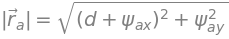

In [5]:
sym.Eq(sym.Symbol(r'|\vec{r}_a|'),r_a.magnitude() )

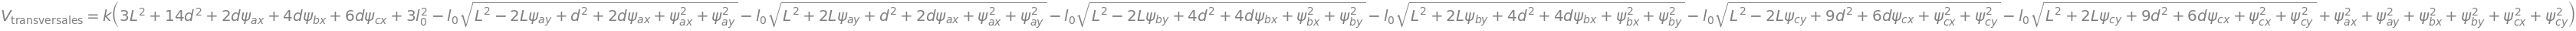

In [6]:
l_trans_1abajo = r_a - (-L* N.y)
l_trans_1arriba = r_a - (L* N.y)
l_trans_2abajo = r_b - (-L* N.y)
l_trans_2arriba = r_b - (L* N.y)
l_trans_3abajo = r_c - (-L* N.y)
l_trans_3arriba = r_c - (L* N.y)

V_trans_rhs= (k/2)* (
    (l_trans_1abajo.magnitude() - l0)**2 +
    (l_trans_1arriba.magnitude() - l0)**2 +
    (l_trans_2abajo.magnitude() - l0)**2 +
    (l_trans_2arriba.magnitude() - l0)**2 +
    (l_trans_3abajo.magnitude() - l0)**2 +
    (l_trans_3arriba.magnitude() - l0)**2
)
V_trans_lhs = sym.Symbol('V_\mathrm{transversales}')
V_trans = sym.Eq(V_trans_lhs, V_trans_rhs.expand().simplify() )
V_trans

El monstruoso potencial del sistema es 

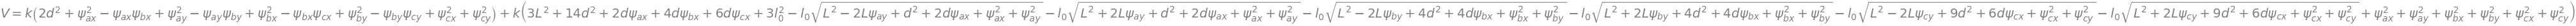

In [7]:
V = sym.Eq(sym.Symbol('V'), V_long.rhs+ V_trans.rhs )
V

## 2.a ley de Newton

Empiezo con la partícula 1.
En $\hat{x}$, $$
    m \ddot{\psi}_{ax} = - \frac{\partial}{\partial \psi_{ax}} V
$$

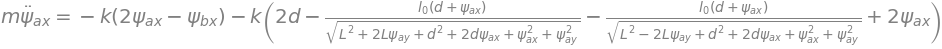

In [8]:
psia_x_2a = sym.Eq(m* psiax.diff(t, 2), - V.rhs.diff(psiax) )
psia_x_2a

Esto puede verse mejor.

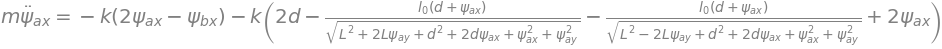

In [9]:
psia_x_2a.simplify()

Sabemos que esto hay que desarrollar en serie de Taylor a primer orden en función 

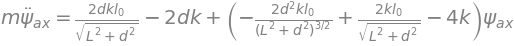

In [11]:
segundaLey = psia_x_2a
variable = psiax

taylor_subs ={
    psiax : 0,
    psiay : 0,
    psibx : 0,
    psiby : 0,
    psicx : 0,
    psicy : 0,
}

segundaLey_rhs_1erOrden = segundaLey.rhs.subs(taylor_subs) + segundaLey.rhs.diff(variable).subs(taylor_subs)* variable
segundaLey_rhs_1erOrden = segundaLey_rhs_1erOrden.simplify().collect(variable) # collect agrupa lo que multiplica a su argumento
segundaLey_rhs_1erOrden
sym.Eq(psia_x_2a.lhs, segundaLey_rhs_1erOrden)